In [1]:
import torch
import torchvision
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## MNIST

In [2]:
dl_train = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST('./data/mnist', train=True, download=True))

dl_test  = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST('./data/mnist', train=False, download=True))

In [3]:
train_data   = dl_train.dataset.data.to(dtype=torch.float32)
train_labels = dl_train.dataset.targets

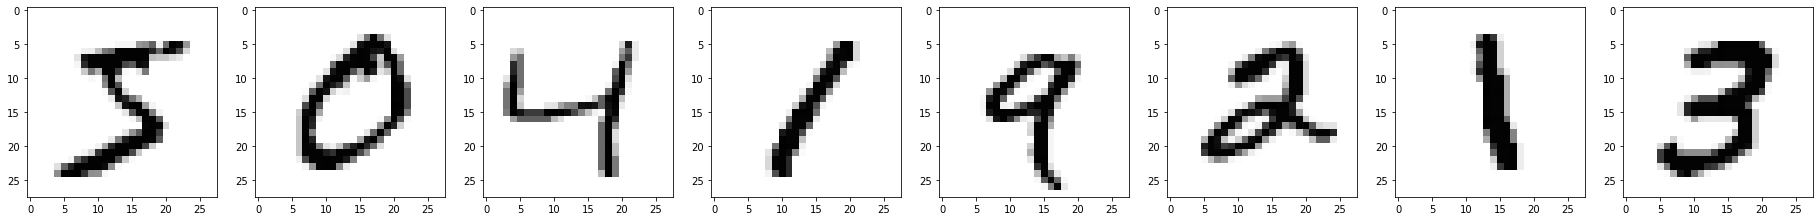

In [4]:
fig_mnist, ax = plt.subplots(1,8, figsize=(8*4,4))
for i in range(8):
    ax[i].imshow(train_data[i].numpy(), cmap='Greys');

In [5]:
train_labels[0:8]

tensor([5, 0, 4, 1, 9, 2, 1, 3])

In [6]:
train_dataset = torch.utils.data.TensorDataset( 
    (train_data/256.0).view(-1,28*28), 
    train_labels)

In [7]:
train_loader = torch.utils.data.DataLoader(train_dataset, 
                                           batch_size=100, 
                                           shuffle=True)

In [32]:
test_data   = dl_test.dataset.data.to(dtype=torch.float32)
test_labels = dl_test.dataset.targets
test_dataset = torch.utils.data.TensorDataset(
    (test_data/256.0).view(-1,28*28), test_labels)

In [9]:
from torch import nn

In [10]:
model = torch.nn.Sequential(
    nn.Linear(28*28,512), nn.ReLU(),
    nn.Linear(512,256), nn.ReLU(),
    nn.Linear(256,128), nn.ReLU(),
    nn.Linear(128,10)
)

In [22]:
optim = torch.optim.SGD(model.parameters(), lr=0.1, momentum=0.6)

In [23]:
loss_f = nn.CrossEntropyLoss()

In [13]:
errors = []
batches = 0
epochs = 0

In [28]:
%%time
for e in range(2):
    for d in train_loader:        
        optim.zero_grad()
        features, labels = d
        pred = model(features)
        loss = loss_f(pred, labels)
        errors.append(loss.item())
        loss.backward()
        optim.step()
        batches += 1
    epochs += 1   
print(loss)        

tensor(0.0508, grad_fn=<NllLossBackward>)
CPU times: user 1min 7s, sys: 499 ms, total: 1min 7s
Wall time: 6.17 s


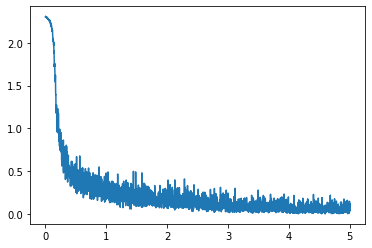

In [29]:
plt.plot(np.linspace(0,epochs, batches),errors)

In [30]:
with torch.no_grad():
    pred = torch.softmax(model(train_dataset[:][0]),1)
    ac = torch.sum(torch.argmax(pred,1)==train_labels).to(dtype=torch.float32)/len(train_dataset)
ac  

tensor(0.9801)

In [31]:
with torch.no_grad():
    pred = torch.softmax(model(test_dataset[:][0]),1)
    ac = torch.sum(torch.argmax(pred,1)==test_labels).to(dtype=torch.float32)/len(test_dataset)
ac    

tensor(0.9716)

In [34]:
torch.save(model,"mnist.pt")

/Users/pbialas/miniconda3/envs/deeplearning/lib/python3.6/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Sequential. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/Users/pbialas/miniconda3/envs/deeplearning/lib/python3.6/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Linear. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/Users/pbialas/miniconda3/envs/deeplearning/lib/python3.6/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type ReLU. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


In [35]:
copy= torch.load("mnist.pt")

In [36]:
with torch.no_grad():
    pred = torch.softmax(copy(train_dataset[:][0]),1)
    ac = torch.sum(torch.argmax(pred,1)==train_labels).to(dtype=torch.float32)/len(train_dataset)
ac 

tensor(0.9801)